# Задачи

1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.  
2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
3. Сколько транзакций завершились ошибкой?
4. Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.  
5. Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.  
6. Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.  
7. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

## Данные

- date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)  
- name – имя пользователя  
- transaction – статус транзакции  
- minute* – сколько минут прошло с начала дня  

Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Вопрос: сколько в датасете пропущенных значений?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('d://Carpov_Courses/projects/transactions/transaction_data.csv')

In [9]:
df.shape

(5315, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [11]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


In [14]:
df.isnull().sum()# ропущенных нет

date           0
name           0
transaction    0
dtype: int64

Проверьте, какие значения принимает колонка transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

In [16]:
df.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [21]:
df.groupby('transaction', as_index=False).agg({'name':'count'})

,transaction,name
0,cancelled,1619
1,error,4
2,successfull,3692


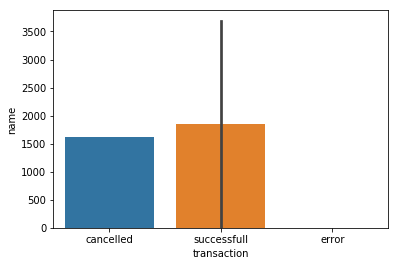

In [22]:
sns.barplot(x = df.transaction, y = df.groupby('transaction', as_index=False).agg({'name':'count'}).name)

Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull  
Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где  
по оси x – число транзакций  
по оси y – доля пользователей с таким числом транзакций

In [44]:
success.groupby('name').agg({'transaction':'count'}).describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


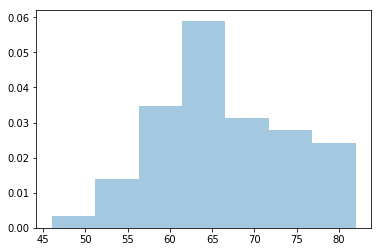

In [40]:
success = df.query('transaction == "successfull"')
success.groupby('name').agg({'transaction':'count'})
sns.distplot(success.groupby('name').agg({'transaction':'count'}),kde=False, norm_hist=True)
#plt.hist(success.groupby('name').agg({'transaction':'count'}), normed=True)

К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:  

столбцы – имена пользователей  
строки – минута времени осуществления операции (minute)  
значения – число совершённых операций  
Пропущенные значения заполните нулями.  

Note: фильтровать успешные транзакции не нужно - постройте табличку по всем

In [71]:
df_new = pd.read_csv('d://Carpov_Courses/projects/transactions/transaction_data_updated.csv')

In [46]:
df_new.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [50]:
df_new.groupby(['name','minute'], as_index=False).agg({'transaction':'count'})

,name,minute,transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [47]:
df_new.isnull().sum()# нулей нет

date           0
name           0
transaction    0
minute         0
dtype: int64

In [ ]:
user_vs_minute_pivot = df.pivot(index='minute', columns='name', values=)

In [55]:
user_vs_minute_pivot = df_new.groupby(['name','minute'], as_index=False) \
                        .agg({'transaction':'count'}) \
                        .pivot(index='minute', columns='name', values='transaction') \
                        .fillna(0)

In [56]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


Посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).

In [72]:
df = df_new

In [75]:
df['full_date'] = pd.to_datetime(df.date)
df.dtypes

date                   object
name                   object
transaction            object
minute                  int64
full_date      datetime64[ns]
dtype: object

In [76]:
df['true_minute'] = df.full_date.dt.minute +  df.full_date.dt.hour * 60

In [77]:
df.head()

,date,name,transaction,minute,full_date,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,2020-03-02 00:37:20,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,2020-03-02 00:59:09,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,2020-03-02 01:06:14,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2020-03-02 00:02:58,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,2020-03-02 00:17:52,17


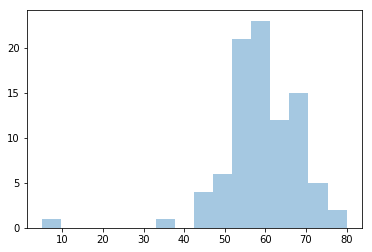

In [80]:
#plt.hist(x=df['true_minute'], y=df[])
_ = sns.distplot(df.groupby('true_minute').agg({'transaction':'count'}),kde=False)

In [84]:
df1 = df.groupby('true_minute', as_index=False).agg({'transaction':'count'})
df1.head()

,true_minute,transaction
0,0,64
1,1,77
2,2,68
3,3,65
4,4,57


In [95]:
x=df1['true_minute']
x.nunique()

90

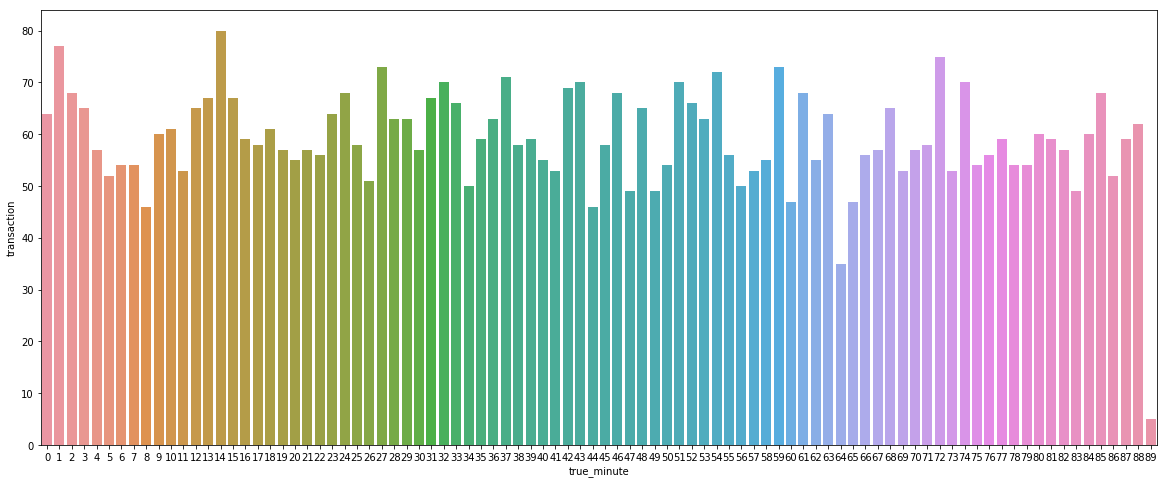

In [102]:
plt.figure(figsize=(20, 8))
_ = sns.barplot(x=df1.true_minute, y=df1.transaction)